# Open-source and Python for the acquisition and the treatment of scientific big data

## Example of an experiment of stratified and rotating turbulence in the Coriolis platform

Pierre Augier

LEGI, CNRS, UGA, Grenoble-INP

## Issues: 

- Open-science? Open-data? Open-source?

- How to write reusable code? 

- Benefit from recent and future software and hardward developments?

## Some answers:

- good coding practices, forges, documentation, unittests, continuous integration, benchmarking
- specialized libraries by and for scientific communities

  * [astropy](http://www.astropy.org/) (astronomy)
  * [obspy](https://github.com/obspy/obspy/wiki) (seismology)
  * [biopython](https://github.com/biopython/biopython) (molecular biology)
  * atmospheric and oceanic sciences (see for example [this post](https://drclimate.wordpress.com/2016/10/04/the-weatherclimate-python-stack/))

Only the very beginning of this trend in fluid mechanics.

## FluidDyn project: a suite of Python packages for fluid dynamics

Open-source, documented, tested, continuous integration

- [fluiddyn](https://bitbucket.org/fluiddyn/fluiddyn): base package containing utilities
- [fluidlab](https://bitbucket.org/fluiddyn/fluidlab): control of laboratory experiments
- [fluidimage](https://bitbucket.org/fluiddyn/fluidimage): scientific treatments of images (PIV)
- [fluidfft](https://bitbucket.org/fluiddyn/fluidfft): C++ / Python Fourier transform library (highly distributed, MPI, CPU/GPU, 2D and 3D)
- [fluidsim](https://bitbucket.org/fluiddyn/fluidsim): pseudo-spectral simulations in 2D and 3D
- [fluidfoam](https://bitbucket.org/fluiddyn/fluidfoam): Python utilities for openfoam

Main developpers: Pierre Augier (LEGI), Cyrille Bonamy (LEGI), Antoine Campagne (LEGI), Ashwin Vishnu (KTH), Julien Salort (ENS Lyon).


## The MILESTONE experiment: stratified and rotating turbulence in the Coriolis platform

<img src="./fig/coriolis2.jpg"  style="width: 70%" align="middle">

<h4 align="center">The Coriolis platform (13 m diameter)</h4> 

## The MILESTONE experiment: stratified and rotating turbulence in the Coriolis platform

In collaboration with a group from KTH (Stockholm): Erik Lindborg, Antoine Campagne, Joël Sommeria, Pierre Augier, ...




<img src="./fig/scheme_exp_grid_MILESTONE_Euhit.png"  style="width: 65%" align="middle">

## The MILESTONE experiment: stratified and rotating turbulence in the Coriolis platform

<img src="./fig/fig_scheme_milestone.jpg"  style="width: 70%" align="middle">

## fluidlab: control of experiments in fluid mechanics

(in collaboration with Julien Salors, ENS Lyon)

### Physical experiments can be seen as the interaction of autonomous physical objects

Examples of the MILESTONE experiments:
- moving carriage, motor (Modbus TCP), position sensor (quadrature signal)
- probes attached to a transverses (Modbus TCP)

- scanning Particle Image Velocimetry (PIV):
  - oscillating mirror driven by an acquisition board
  - cameras triggered by a signal produced by an acquisition board

Issue: control with computers the interaction and synchronization of the objects

## fluidlab: control of experiments in fluid mechanics

(in collaboration with Julien Salors, ENS Lyon)

### Physical experiments can be seen as the interaction of autonomous physical objects

Object-oriented programming is very adapted.

**Remark**: simple servers with the Python package `rcpy` are useful and efficient:

#### Carriage
- `motor.py`
- `position_sensor.py`
- `position_sensor_server.py`
- `position_sensor_client.py`
- `carriage.py`
- `carriage_server.py`
- `carriage_client.py`

#### Probes
- `traverse.py`
- `probe.py`
- `moving_probe.py`

## fluidlab: control of experiments in fluid mechanics

A little bit of Graphical User Interface is easy, fun and useful. We use PyQt.

<img src="./fig/gui_carriage.jpg"  style="width: 75%" align="middle">

Remark: reusable code, here, random movement for another experiment.

# Treatment of experimental data 
(in particular large series of images)

- copy into the LEGI cluster disks, reorganization and format conversions (in parallel to saturate the efficient connexion)
- preprocessing of images: png -> png (calcul on the LEGI cluster)
- scientific treatment of images and other data (calcul on the LEGI cluter)
- production of scientific figures

## fluidimage: scientific treatments of images

(in collaboration with Cyrille Bonamy and Antoine Campagne, LEGI)

Software for images preprocessing and PIV computation

Many images (~ 20 To of raw data): embarrassingly parallel problem

- Asynchronous computations (topologies of treatments, IO and CPU bounded parts are splitted)
- Clusters
- CPU/GPU
- Efficient algorythms and numerical tools

## Calcul of scanning PIV on the LEGI cluster

Steps:
- calibration (using **UVmat**),
- pre-processing of images,
- calcul of PIV for the different levels,
- going into real space and reorganization of the data.

Remark: done with clever scripts using fluidimage and adapting the parameters to the experiments and levels.

Remark: there are also minimalist elements of GUI for PIV computations.

Remark: very demanding in terms of Input/Output.

## Calcul of scanning PIV on the LEGI cluster

Remark: launching computations on the cluster is highly simplified by using fluiddyn:

```python
from fluiddyn.clusters.legi import Calcul7

cluster = Calcul7()

cluster.submit_script(
    'piv_complete.py', name_run='fluidimage',
    nb_cores_per_node=8,
    walltime='3:00:00',
    omp_num_threads=1,
    idempotent=True, delay_signal_walltime=300)
```




## Analysis and production of scientific figures

- Mainly using the core scientific Python packages (numpy, scipy and matplotlib)
- A lot of different files for different types of data (txt and hdf5 files)
- Classes for
  * experiments
  * types of data (for example probe data or PIV field).

In [1]:
# this ipython command loads a special backend for notebooks
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
from fluidcoriolis.milestone import Experiment
iexp = 70
exp = Experiment(iexp)
exp.name

'Exp70_2016-07-13_N0.8_L6.0_V0.08_piv3d'

In [3]:
print('N = {} rad/s and Uc = {} m/s'.format(exp.N, exp.Uc))

N = 0.8 rad/s and Uc = 0.08 m/s


In [55]:
print('R = {:.0f} and Fh = {:.2f}'.format(exp.Rc, exp.Fhc))

R = 3200 and Fh = 0.40


In [4]:
from fluidcoriolis.milestone.time_signals import TimeSignals
signals = TimeSignals(iexp)

Experiment 70
Probe on the carriage without correction in temperature.
Probe at the surface with correction in temperature.
Probe at the bottom with correction in temperature.
Probe on the left without correction in temperature.
Probe on the right with correction in temperature.


<IPython.core.display.Javascript object>


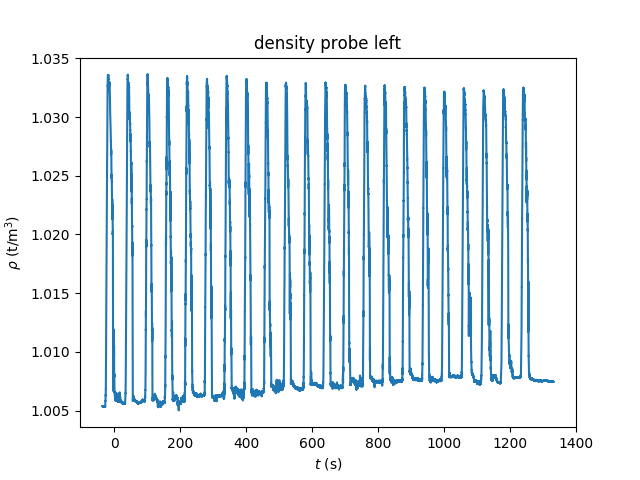

In [5]:
signals.probe_left.plot_density()

<IPython.core.display.Javascript object>


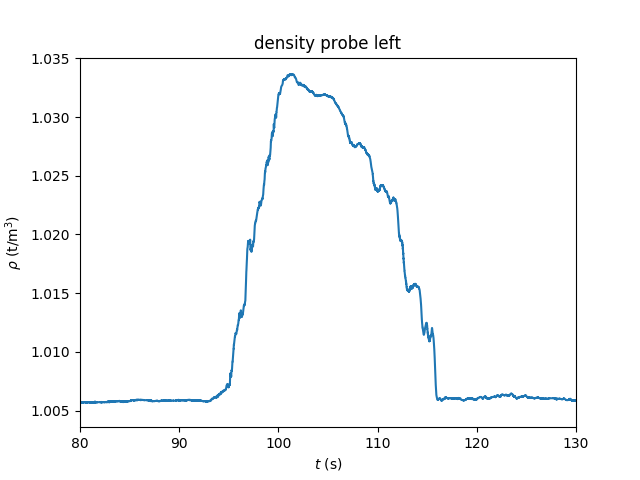

In [58]:
signals.probe_left.plot_density()
_ = plt.xlim([80, 130])

<IPython.core.display.Javascript object>


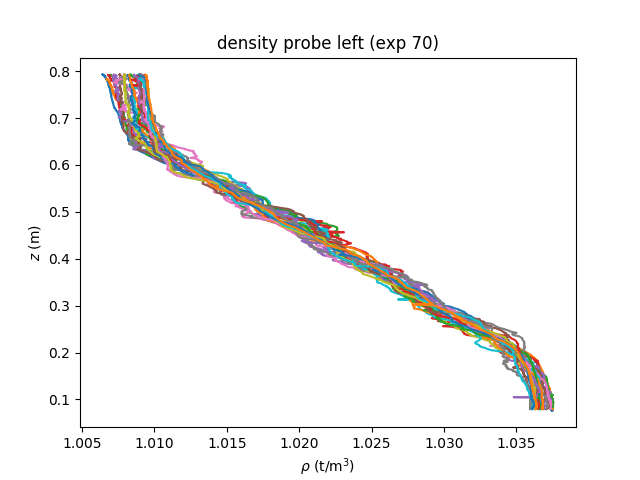

In [7]:
signals.probe_left.plot_profiles()

Experiment 70


<IPython.core.display.Javascript object>


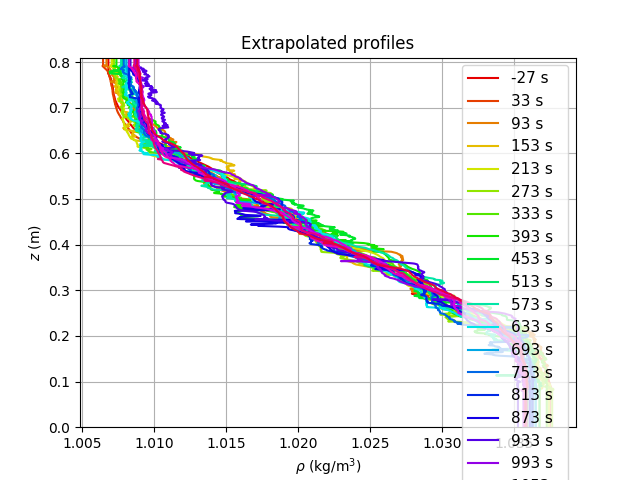

In [8]:
from fluidcoriolis.milestone.energy_profiles import AnalyseProfiles
ap = AnalyseProfiles(iexp)
ap.plot_profiles()

<IPython.core.display.Javascript object>


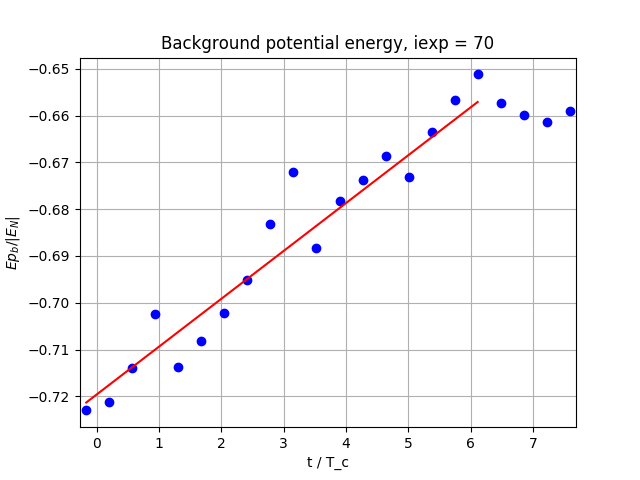

In [9]:
ap.plot_background_ep_meanprf()

## Studying and plotting PIV data

In [19]:
pack = exp.get_piv_pack()
pack.path_dir

'/fsnet/project/coriolis/2016/16MILESTONE/Data_light/PCO_top/Exp70_2016-07-13_N0.8_L6.0_V0.08_piv3d'

In [46]:
import os
os.listdir(pack.path_dir)[:10]

['v_exp70_t00.h5',
 'v_exp70_t01.h5',
 'v_exp70_t02.h5',
 'v_exp70_t03.h5',
 'v_exp70_t04.h5',
 'v_exp70_t05.h5',
 'v_exp70_t06.h5',
 'v_exp70_t07.h5',
 'v_exp70_t08.h5',
 'v_exp70_t09.h5']

In [57]:
piv_fields = pack.get_piv_array_toverT(2)
piv_fields = piv_fields.truncate(4).gaussian_filter(0.5)

/fsnet/project/coriolis/2016/16MILESTONE/Data_light/PCO_top/Exp70_2016-07-13_N0.8_L6.0_V0.08_piv3d/v_exp70_t02.h5


<IPython.core.display.Javascript object>


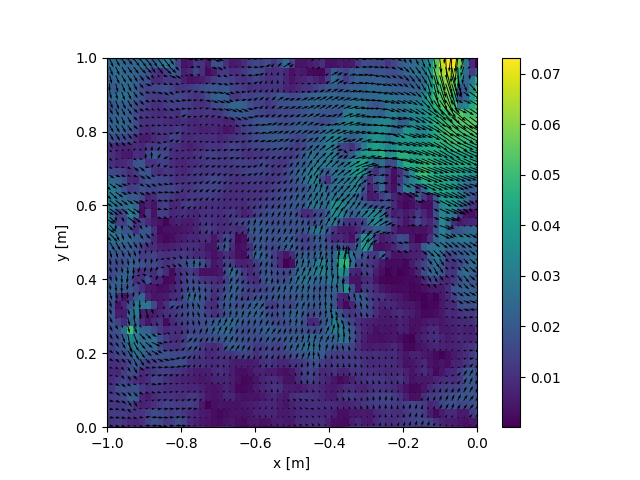

In [59]:
piv = piv_fields[10]
piv.display()
plt.xlim([-1, 0])
_ = plt.ylim([0, 1])

Inspired by pivmat (Matlab toolbox by Frédéric Moisy) but can be greatly improved!

## Recent development of fluidimage by Antoine Campagne

### Utilities to display and analyze the PIV fields

- spectra

- anisotropic structure functions

- characteristic turbulent length scales

### Everything to do scanning stereo-PIV

## Conclusions

1. Rotating and stratified turbulence experiment with Python

2. Big data, efficient computation on clusters

3. Development of *open-source*, *clean*, *reusable* codes (fluiddyn project)

**Issue :** collaborative dynamics !